In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Importing Libraries**


In [ ]:
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Embedding, Flatten, Activation
from keras.layers.pooling import GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.initializers import Constant
from keras.utils import np_utils
from keras.initializers import Constant
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import nltk
import numpy as np
import codecs

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))
not_stopwords = {'not','no'} 
final_stop_words= set([word for word in stop_words if word not in not_stopwords])

In [ ]:
np.random.seed(42)

# train_review = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/SST2_reviews_train.txt'
# train_sentiment = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/SST2 sentiment_train.txt'

# test_review = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/SST2_reviews_test.txt'
# test_sentiment = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/SST2_sentiment_test.txt'


train_review = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1000 SST2_reviews_train.txt'
train_sentiment = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1000 SST2_sentiment_train.txt'

test_review = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1000 SST2_reviews_test.txt'
test_sentiment = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1000 SST2_sentiment_test.txt'

VOCAB_SIZE = 15000
EMBED_SIZE = 300
NUM_FILTERS = 256
NUM_WORDS = 3
BATCH_SIZE = 16
NUM_EPOCHS = 60


##**Dataset Preparation and Cleaning**

In [ ]:
counter = collections.Counter()
maxlen = 0
train_xs_word2vec, train_ys_word2vec = [], []


train_fin_review = codecs.open(train_review, "r", encoding='utf-8')
for line in train_fin_review:
    sent = line #Stripping the dataset based on tab. That is stripping label from sentence

    print("Sentence: ",sent)

    words = [x.lower() for x in nltk.word_tokenize(sent)] #lowering the sentence and tokenizing
    print("Actual:")
    print(words)

    wordsExcludingPunctuationMarks=[word for word in words if word.isalnum()]
    print("Truncating punctuation:")
    print(wordsExcludingPunctuationMarks)

    wordsExcludingStopWords = [word for word in wordsExcludingPunctuationMarks if word not in final_stop_words]
    print("Truncating StopWords:")
    print(wordsExcludingStopWords)




    afterLemmatizing = [lemmatizer.lemmatize(token) for token in wordsExcludingStopWords]
    afterLemmatizing = [lemmatizer.lemmatize(token, "v") for token in afterLemmatizing]
    print("After Lemmatizing:")
    print(afterLemmatizing)



    if len(afterLemmatizing) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(afterLemmatizing) 
    for afterLemmitize in afterLemmatizing:
        counter[afterLemmitize] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    train_xs_word2vec.append(afterLemmatizing )

train_fin_review.close()



Streaming output truncated to the last 5000 lines.
Truncating punctuation:
['we', 'get', 'the', 'comedy', 'we', 'settle', 'for']
Truncating StopWords:
['get', 'comedy', 'settle']
After Lemmatizing:
['get', 'comedy', 'settle']
***************************************************************************************
Sentence:  eerily accurate depiction of depression .

Actual:
['eerily', 'accurate', 'depiction', 'of', 'depression', '.']
Truncating punctuation:
['eerily', 'accurate', 'depiction', 'of', 'depression']
Truncating StopWords:
['eerily', 'accurate', 'depiction', 'depression']
After Lemmatizing:
['eerily', 'accurate', 'depiction', 'depression']
***************************************************************************************
Sentence:  schrader aims to present an unflinching look at one man 's downfall , brought about by his lack of self-awareness .

Actual:
['schrader', 'aims', 'to', 'present', 'an', 'unflinching', 'look', 'at', 'one', 'man', "'s", 'downfall', ',', 'brought

In [ ]:
train_fin_sentiment = codecs.open(train_sentiment, "r", encoding='utf-8')

for line in train_fin_sentiment:
  train_ys_word2vec.append(int(line))
  
train_fin_sentiment.close()

train_ys_word2vec

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
train_xs_word2vec
print(len(train_xs_word2vec))

800


In [ ]:
print("Maximum number of word in a sentence: ",maxlen)
print("Frequency of each words: ")
counter

Maximum number of word in a sentence:  23
Frequency of each words: 


Counter({'apparently': 2,
         'reassemble': 1,
         'floor': 1,
         'give': 16,
         'daytime': 1,
         'soap': 4,
         'presume': 1,
         'audience': 12,
         'wo': 7,
         'sit': 7,
         'still': 16,
         'sociology': 1,
         'lesson': 1,
         'however': 3,
         'entertainingly': 1,
         'present': 3,
         'trot': 2,
         'conventional': 1,
         'element': 1,
         'monster': 1,
         'futuristic': 1,
         'woman': 10,
         'skimpy': 1,
         'clothe': 2,
         'fan': 7,
         'film': 126,
         'uninitiated': 1,
         'play': 12,
         'better': 18,
         'video': 6,
         'sound': 4,
         'turn': 7,
         'little': 32,
         'le': 8,
         'extreme': 3,
         'past': 4,
         'longer': 2,
         'exposition': 1,
         'sequence': 5,
         'fewer': 1,
         'gag': 4,
         'break': 4,
         'tedium': 1,
         'strictly': 2,
         '

##**Generating Word2index**

In [ ]:
word2index = collections.defaultdict(int) 
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1

word2index  

defaultdict(int,
            {'film': 1,
             'movie': 2,
             'make': 3,
             'one': 4,
             'like': 5,
             'not': 6,
             'character': 7,
             'story': 8,
             'work': 9,
             'time': 10,
             'little': 11,
             'no': 12,
             'good': 13,
             'feel': 14,
             'even': 15,
             'never': 16,
             'get': 17,
             'director': 18,
             'comedy': 19,
             'see': 20,
             'may': 21,
             'take': 22,
             'come': 23,
             'go': 24,
             'much': 25,
             'look': 26,
             'action': 27,
             'way': 28,
             'performance': 29,
             'seem': 30,
             'life': 31,
             'better': 32,
             'love': 33,
             'want': 34,
             'nothing': 35,
             'give': 36,
             'still': 37,
             'new': 38,
             'funny': 

In [ ]:
vocab_sz = len(word2index) + 1
print("Number of Vocabularies: ",vocab_sz)

Number of Vocabularies:  3170


In [ ]:
train_xs, train_ys = [], []
test_xs, test_ys = [], []

train_fin_review = codecs.open(train_review, "r", encoding='utf-8')
for line in train_fin_review:
    sent = line #Stripping the dataset based on tab. That is stripping label from sentence

    words = [x.lower() for x in nltk.word_tokenize(sent)] #lowering the sentence and tokenizing
    wordsExcludingPunctuationMarks=[word for word in words if word.isalnum()]
    wordsExcludingStopWords = [word for word in wordsExcludingPunctuationMarks if word not in final_stop_words]

    afterLemmatizing = [lemmatizer.lemmatize(token) for token in wordsExcludingStopWords]
    afterLemmatizing = [lemmatizer.lemmatize(token, "v") for token in afterLemmatizing]

    wids = [word2index[word] for word in afterLemmatizing]
    train_xs.append(wids)

train_ys = train_ys_word2vec
train_fin_review.close()



#For Validation
test_fin_review = codecs.open(test_review, "r", encoding='utf-8')
for line in test_fin_review:
    sent = line #Stripping the dataset based on tab. That is stripping label from sentence

    words = [x.lower() for x in nltk.word_tokenize(sent)] #lowering the sentence and tokenizing
    wordsExcludingPunctuationMarks=[word for word in words if word.isalnum()]
    wordsExcludingStopWords = [word for word in wordsExcludingPunctuationMarks if word not in final_stop_words]

    afterLemmatizing = [lemmatizer.lemmatize(token) for token in wordsExcludingStopWords]
    afterLemmatizing = [lemmatizer.lemmatize(token, "v") for token in afterLemmatizing]

    wids = [word2index[word] for word in afterLemmatizing]
    test_xs.append(wids)

test_fin_review.close()



#For Validation
test_fin_sentiment = codecs.open(test_sentiment, "r", encoding='utf-8')

for line in test_fin_sentiment:
  test_ys.append(int(line))
  
test_fin_sentiment.close()

test_ys

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0]

In [ ]:
for i in range(len(train_xs)):
  print(train_xs_word2vec[i])
  print(train_xs[i])


['apparently', 'reassemble', 'floor', 'give', 'daytime', 'soap']
[625, 1174, 1175, 36, 1176, 278]
['presume', 'audience', 'wo', 'sit', 'still', 'sociology', 'lesson', 'however', 'entertainingly', 'present', 'trot', 'conventional', 'element', 'monster', 'futuristic', 'woman', 'skimpy', 'clothe']
[1177, 60, 135, 136, 37, 1178, 1179, 403, 1180, 404, 626, 1181, 1182, 1183, 1184, 76, 1185, 627]
['fan', 'film', 'uninitiated', 'play', 'better', 'video', 'sound', 'turn']
[137, 1, 1186, 61, 32, 171, 279, 138]
['little', 'le', 'extreme', 'past', 'longer', 'exposition', 'sequence', 'fewer', 'gag', 'break', 'tedium']
[11, 113, 405, 280, 628, 1187, 208, 1188, 281, 282, 1189]
['film', 'strictly', 'routine']
[1, 629, 406]
['repugnant', 'adaptation', 'classic', 'text', 'since', 'roland', 'demi', 'moore', 'scarlet', 'letter']
[1190, 407, 172, 408, 139, 1191, 1192, 630, 1193, 1194]
['something', 'particular', 'film', 'viewer', 'expect', 'something', 'special', 'instead', 'get', 'rehash']
[52, 631, 1, 20

In [ ]:
train_ys

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
Xtrain = pad_sequences(train_xs, maxlen=maxlen)
Ytrain = np_utils.to_categorical(train_ys)

Xtest = pad_sequences(test_xs, maxlen=maxlen)
Ytest = np_utils.to_categorical(test_ys)

In [ ]:
Xtrain

array([[   0,    0,    0, ...,   36, 1176,  278],
       [   0,    0,    0, ...,   76, 1185,  627],
       [   0,    0,    0, ...,  171,  279,  138],
       ...,
       [   0,    0,    0, ...,    1,  294, 1164],
       [   0,    0,    0, ..., 3167, 3168,  954],
       [   0,    0,    0, ...,  520, 3169,   93]], dtype=int32)

In [ ]:
print(Ytrain[8])

[1. 0.]


#**Word2Vec**

In [ ]:
import gensim
model=gensim.models.Word2Vec(sentences=train_xs_word2vec,size=300,window=5,min_count=1, sg=0)

In [ ]:
model.train(train_xs_word2vec,epochs=100,total_examples=len(train_xs_word2vec))

(691312, 728200)

In [ ]:
model.wv.most_similar("bad")

[('idea', 0.9815106391906738),
 ('follow', 0.979472279548645),
 ('fragment', 0.9733821153640747),
 ('essential', 0.969534158706665),
 ('poetry', 0.9655306339263916),
 ('chin', 0.9648789763450623),
 ('boast', 0.9584243297576904),
 ('good', 0.9540386199951172),
 ('many', 0.951724112033844),
 ('boy', 0.9516111612319946)]

In [ ]:
model.wv.most_similar("good")

[('poetry', 0.9857994318008423),
 ('boast', 0.9849736094474792),
 ('fragment', 0.9846420288085938),
 ('idea', 0.9623337984085083),
 ('bad', 0.9540386199951172),
 ('match', 0.9480702877044678),
 ('follow', 0.9351047277450562),
 ('essential', 0.9313732385635376),
 ('really', 0.9275941848754883),
 ('intention', 0.9155710935592651)]

In [ ]:
vocab=model.wv.vocab
print("The total number of words are : ",len(vocab))


The total number of words are :  3169


In [ ]:
vocab=list(vocab.keys())


In [ ]:
for word in vocab:
  print(word)


apparently
reassemble
floor
give
daytime
soap
presume
audience
wo
sit
still
sociology
lesson
however
entertainingly
present
trot
conventional
element
monster
futuristic
woman
skimpy
clothe
fan
film
uninitiated
play
better
video
sound
turn
little
le
extreme
past
longer
exposition
sequence
fewer
gag
break
tedium
strictly
routine
repugnant
adaptation
classic
text
since
roland
demi
moore
scarlet
letter
something
particular
viewer
expect
special
instead
get
rehash
tuxedo
actually
suit
would
fit
chan
like
99
final
verdict
see
blue
crush
follow
formula
throw
many
conflict
keep
story
compel
sense
good
intention
derail
failure
seek
strike
right
tone
wretched
movie
reduce
second
world
war
one
man
quest
find
old
flame
undoubtedly
well
european
market
besson
brand
name
asia
shu
institution
american
probably
familiar
insufficiently
cathartic
lack
inspiration
original
bloat
plot
stretch
run
time
10
minute
child
interest
adult
patience
bad
gooding
offer
desperately
ingratiate
performance
effort
burde

In [ ]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) 
print(word_vec_dict.keys())

print("***")

res = list(word_vec_dict.values())[0]
print(str(res))

The no of key-value pairs :  3169
dict_keys(['apparently', 'reassemble', 'floor', 'give', 'daytime', 'soap', 'presume', 'audience', 'wo', 'sit', 'still', 'sociology', 'lesson', 'however', 'entertainingly', 'present', 'trot', 'conventional', 'element', 'monster', 'futuristic', 'woman', 'skimpy', 'clothe', 'fan', 'film', 'uninitiated', 'play', 'better', 'video', 'sound', 'turn', 'little', 'le', 'extreme', 'past', 'longer', 'exposition', 'sequence', 'fewer', 'gag', 'break', 'tedium', 'strictly', 'routine', 'repugnant', 'adaptation', 'classic', 'text', 'since', 'roland', 'demi', 'moore', 'scarlet', 'letter', 'something', 'particular', 'viewer', 'expect', 'special', 'instead', 'get', 'rehash', 'tuxedo', 'actually', 'suit', 'would', 'fit', 'chan', 'like', '99', 'final', 'verdict', 'see', 'blue', 'crush', 'follow', 'formula', 'throw', 'many', 'conflict', 'keep', 'story', 'compel', 'sense', 'good', 'intention', 'derail', 'failure', 'seek', 'strike', 'right', 'tone', 'wretched', 'movie', 'reduc

#**Word Embeddings**

In [ ]:
# now creating the embedding matrix
embed_dim = 300
from nltk import word_tokenize,sent_tokenize # tokenizing


embed_matrix=np.zeros(shape=(vocab_sz,embed_dim))

print(embed_matrix.shape)

for word,i in word2index.items():
  embed_vector=word_vec_dict.get(word)
  print(str(word) + "***" + str(i))
  if embed_vector is not None and embed_vector.size!=0:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    print("--->"  + str(word) + "***" + str(i))
    print("\n")
  # if word is not found then embed_vector corressponding to that vector will stay zero.

Streaming output truncated to the last 5000 lines.
--->hill***2038


generation***2039
--->generation***2039


siegel***2040
--->siegel***2040


robert***2041
--->robert***2041


aldrich***2042
--->aldrich***2042


discernible***2043
--->discernible***2043


beneath***2044
--->beneath***2044


freely***2045
--->freely***2045


mingle***2046
--->mingle***2046


japanese***2047
--->japanese***2047


irwin***2048
--->irwin***2048


television***2049
--->television***2049


literarily***2050
--->literarily***2050


notorious***2051
--->notorious***2051


snowman***2052
--->snowman***2052


vile***2053
--->vile***2053


scummy***2054
--->scummy***2054


ripoff***2055
--->ripoff***2055


cronenberg***2056
--->cronenberg***2056


videodrome***2057
--->videodrome***2057


denial***2058
--->denial***2058


mourn***2059
--->mourn***2059


favor***2060
--->favor***2060


bogus***2061
--->bogus***2061


spiritualism***2062
--->spiritualism***2062


network***2063
--->network***2063


inoffensive**

#**For Pretrained Word2Vec**





In [ ]:
# from gensim.models import KeyedVectors

# WORD2VEC_MODEL = '/content/drive/MyDrive/Pretrained Word2Vec/GoogleNews-vectors-negative300.bin'

# word2vec = KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True)
# embed_matrix = np.zeros((vocab_sz, EMBED_SIZE))
# for word, index in word2index.items():
#     try:
#         embed_matrix[index, :] = word2vec[word]
#     except KeyError:
#         pass

#**Test Train Split**

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)


(800, 23)
(800, 2)


In [ ]:
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(800, 23) (200, 23) (800, 2) (200, 2)


#**Learning Rate Range Finder**

In [ ]:
# Github Link: https://gist.github.com/WittmannF/c55ed82d27248d18799e2be324a79473
from keras.callbacks import Callback
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.ndimage.filters import gaussian_filter1d

class LRFinder(Callback):
    """
    Up-to date version: https://github.com/WittmannF/LRFinder
    """
    def __init__(self, min_lr, max_lr, mom=0.9, stop_multiplier=None, 
                 reload_weights=True, batches_lr_update=5):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.mom = mom
        self.reload_weights = reload_weights
        self.batches_lr_update = batches_lr_update
        if stop_multiplier is None:
            self.stop_multiplier = -20*self.mom/3 + 10 # 4 if mom=0.9
                                                       # 10 if mom=0
        else:
            self.stop_multiplier = stop_multiplier
        
    def on_train_begin(self, logs={}):
        p = self.params
        try:
            n_iterations = p['epochs']*p['samples']//p['batch_size']
        except:
            n_iterations = p['steps']*p['epochs']
            
        self.learning_rates = np.geomspace(self.min_lr, self.max_lr, \
                                           num=n_iterations//self.batches_lr_update+1)
        self.losses=[]
        self.iteration=0
        self.best_loss=0
        
        self.per_epoch_loss = []
        

        if self.reload_weights:
            self.model.save_weights('tmp.hdf5')
        




    def get_percentage_diff(previous, current):
      try:
          percentage = abs(previous - current)/max(previous, current) * 100
      except ZeroDivisionError:
          percentage = float('inf')
      return percentage    

    
    def on_batch_end(self, batch, logs={}):
        loss = logs.get('loss')
        if self.iteration!=0: # Make loss smoother using momentum
            loss = self.losses[-1]*self.mom+loss*(1-self.mom)
        
        if self.iteration==0 or loss < self.best_loss: 
                self.best_loss = loss
                
        if self.iteration%self.batches_lr_update==0: # Evaluate each lr over 5 epochs
            
            if self.reload_weights:
                self.model.load_weights('tmp.hdf5')
          
            lr = self.learning_rates[self.iteration//self.batches_lr_update]            
            K.set_value(self.model.optimizer.lr, lr)

            self.losses.append(loss) 
                     

        if loss > self.best_loss*self.stop_multiplier: # Stop criteria
            self.model.stop_training = True
        
        self.iteration += 1


    def on_epoch_end(self, epoch, logs=None):
      
          loss = logs.get('loss') * 100.0

          if len(self.per_epoch_loss)>0:
            previous_minimum_loss = min(self.per_epoch_loss)

          self.per_epoch_loss.append(loss)
          

          if epoch>0:
            print("\n *** Epoch " + str(epoch) + " Completed ***")
            print("Present loss in epoch "+str(epoch)  +": "+ str(loss))
            print("Minimum Loss: " + str(min(self.per_epoch_loss)))


            percentage_icrease = abs(previous_minimum_loss - loss)/max(previous_minimum_loss, loss) * 100
            if loss > previous_minimum_loss:
              print("Loss Increased By: " + str(percentage_icrease))  

              if percentage_icrease>3.0:
                print("\n Alret!!! Loss Increasing, Model Will Stop Now \n")
                self.model.stop_training = True

            else:
              print("Loss Decresed By: " + str(percentage_icrease))
              
        
          else:
            print("\n *** Epoch " + str(epoch) + " Completed ***")

          





    
    def on_train_end(self, logs=None):
        if self.reload_weights:
                self.model.load_weights('tmp.hdf5')

        
        minpos = self.losses.index(min(self.losses))
        global_minima = self.learning_rates[:len(self.losses)][minpos]
        print("Global minima from list:",global_minima)



        plt.figure(figsize=(20, 6))


        # plt.plot(self.learning_rates[:len(self.losses)],self.losses,color="orange",label="Loss vs LR")
        plt.xlabel("Learning Rate")
        plt.ylabel("Loss")


        ysmoothed = gaussian_filter1d(self.losses, sigma=2)
        minpos_graph = np.argmin(ysmoothed)
        plt.plot(self.learning_rates[:len(self.losses)], ysmoothed)
        plt.plot(self.learning_rates[:len(self.losses)][minpos_graph], self.losses[minpos_graph], 'go', label="Minima")


        draw_polynomial = np.poly1d(np.polyfit(self.learning_rates[:len(self.losses)], ysmoothed, 15))
        polyline = np.linspace(self.min_lr, max(self.learning_rates[:len(self.losses)]), 300)
        plt.plot(polyline, draw_polynomial(polyline), color='purple')
        # plt.plot(self.learning_rates[:len(self.losses)][minpos], min(self.losses), 'ro', label="Minima")
 


        roots = [np.real(z) for z in draw_polynomial.deriv().roots 
                if np.imag(z)==0 and self.min_lr<=np.real(z)<=max(self.learning_rates[:len(self.losses)])]

        
        roots.sort()
        minimum_roots = []

        for root in roots:
          second_derivative = draw_polynomial.deriv(2)(root)
          if second_derivative>0:
            print("its minimum: ",root)
            # it's a minimum 
            minimum_roots.append((draw_polynomial(root),root)) 
            

          elif second_derivative<0:
            print("its maximum: ", root)
            
            # it's a maximum
          else:
            print("its point of flexure: ",root)
            # it's a point of flexure


        
        # Sort the list of tuples by the first element of each tuple
        minimum_loss_of_polyfit = sorted(minimum_roots)
        root = minimum_loss_of_polyfit[0][1] 
        f = open("global_minima.txt", "a")
        f.truncate(0)
        f.write(str(root))
        f.close()

        plt.plot([root,root],[draw_polynomial(root),draw_polynomial(root) + 0.1], 'r--')
        base_lr = (70.0 * root) / 100.0
        plt.plot([base_lr ,base_lr ],[draw_polynomial(root),draw_polynomial(root) + 0.1], 'r--')



        plt.xscale('log')
        plt.show()
















# # Github Link: https://gist.github.com/WittmannF/c55ed82d27248d18799e2be324a79473
# from keras.callbacks import Callback
# import keras.backend as K
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import optimize
# from scipy.ndimage.filters import gaussian_filter1d
# from array import array
# import bisect
# import math

# class LRFinder(Callback):
#     """
#     Up-to date version: https://github.com/WittmannF/LRFinder
#     """
#     def __init__(self, min_lr, max_lr, mom=0.9, stop_multiplier=None, 
#                  reload_weights=True, batches_lr_update=5):
#         self.min_lr = min_lr
#         self.max_lr = max_lr
#         self.mom = mom
#         self.reload_weights = reload_weights
#         self.batches_lr_update = batches_lr_update
#         if stop_multiplier is None:
#             self.stop_multiplier = -20*self.mom/3 + 10 # 4 if mom=0.9
#                                                        # 10 if mom=0
#         else:
#             self.stop_multiplier = stop_multiplier
        
#     def on_train_begin(self, logs={}):
#         p = self.params
#         try:
#             n_iterations = p['epochs']*p['samples']//p['batch_size']
#         except:
#             n_iterations = p['steps']*p['epochs']
            
#         self.learning_rates = np.geomspace(self.min_lr, self.max_lr, \
#                                            num=n_iterations//self.batches_lr_update+1)
#         self.losses=[]
#         self.iteration=0
#         self.best_loss=0
        
#         self.per_epoch_loss = []
        

#         if self.reload_weights:
#             self.model.save_weights('tmp.hdf5')
        




#     def get_percentage_diff(previous, current):
#       try:
#           percentage = abs(previous - current)/max(previous, current) * 100
#       except ZeroDivisionError:
#           percentage = float('inf')
#       return percentage    

    
#     def on_batch_end(self, batch, logs={}):
#         loss = logs.get('loss')
#         if self.iteration!=0: # Make loss smoother using momentum
#             loss = self.losses[-1]*self.mom+loss*(1-self.mom)
        
#         if self.iteration==0 or loss < self.best_loss: 
#                 self.best_loss = loss
                
#         if self.iteration%self.batches_lr_update==0: # Evaluate each lr over 5 epochs
            
#             if self.reload_weights:
#                 self.model.load_weights('tmp.hdf5')
          
#             lr = self.learning_rates[self.iteration//self.batches_lr_update]            
#             K.set_value(self.model.optimizer.lr, lr)

#             self.losses.append(loss) 
                     

#         if loss > self.best_loss*self.stop_multiplier: # Stop criteria
#             self.model.stop_training = True
        
#         self.iteration += 1


#     def on_epoch_end(self, epoch, logs=None):
      
#           loss = logs.get('loss') * 100.0

#           if len(self.per_epoch_loss)>0:
#             previous_minimum_loss = min(self.per_epoch_loss)

#           self.per_epoch_loss.append(loss)
          

#           if epoch>0:
#             print("\n *** Epoch " + str(epoch) + " Completed ***")
#             print("Present loss in epoch "+str(epoch)  +": "+ str(loss))
#             print("Minimum Loss: " + str(min(self.per_epoch_loss)))


#             percentage_icrease = abs(previous_minimum_loss - loss)/max(previous_minimum_loss, loss) * 100
#             if loss > previous_minimum_loss:
#               print("Loss Increased By: " + str(percentage_icrease))  

#               if percentage_icrease>3.0:
#                 print("\n Alret!!! Loss Increasing, Model Will Stop Now \n")
#                 self.model.stop_training = True

#             else:
#               print("Loss Decresed By: " + str(percentage_icrease))
              
        
#           else:
#             print("\n *** Epoch " + str(epoch) + " Completed ***")

          
#     def find_closest(lst, num):
#       # Sort the list in ascending order
#       sorted_lst = sorted(lst)

#       # Find the closest element above and below the given number
#       above = None
#       below = None
#       for i in range(len(sorted_lst)):
#         if sorted_lst[i] >= num:
#           above = sorted_lst[i]
#           if i > 0:
#             below = sorted_lst[i - 1]
#           break

#       # Return the closest elements above and below the given number
#       return below


#     def on_train_end(self, logs=None):
#         if self.reload_weights:
#                 self.model.load_weights('tmp.hdf5')

        
#         minpos = self.losses.index(min(self.losses))
#         global_minima = self.learning_rates[:len(self.losses)][minpos]
#         print("Global minima from list:",global_minima)



#         plt.figure(figsize=(20, 6))


#         # plt.plot(self.learning_rates[:len(self.losses)],self.losses,color="orange",label="Loss vs LR")
#         plt.xlabel("Learning Rate")
#         plt.ylabel("Loss")


#         ysmoothed = gaussian_filter1d(self.losses, sigma=2)
#         minpos_graph = np.argmin(ysmoothed)
#         plt.plot(self.learning_rates[:len(self.losses)], ysmoothed)
#         plt.plot(self.learning_rates[:len(self.losses)][minpos_graph], self.losses[minpos_graph], 'go', label="Minima")


#         draw_polynomial = np.poly1d(np.polyfit(self.learning_rates[:len(self.losses)], ysmoothed, 15))
#         polyline = np.linspace(self.min_lr, max(self.learning_rates[:len(self.losses)]), 300)
#         plt.plot(polyline, draw_polynomial(polyline), color='purple')
#         # plt.plot(self.learning_rates[:len(self.losses)][minpos], min(self.losses), 'ro', label="Minima")
 


#         roots = [np.real(z) for z in draw_polynomial.deriv().roots 
#                 if np.imag(z)==0 and self.min_lr<=np.real(z)<=max(self.learning_rates[:len(self.losses)])]

        
#         roots.sort()
#         maximum_roots = []
#         minimum_roots = []
#         distance = []

#         for root in roots:
#           second_derivative = draw_polynomial.deriv(2)(root)
#           if second_derivative>0:
#             print("its minimum: ",root)
#             # it's a minimum 
#             minimum_roots.append(root)
#             plt.plot([root,root],[0.7,0.72], 'g--')
#           elif second_derivative<0:
#             print("its maximum: ", root)
#             # it's a maximum
#             maximum_roots.append(root)
#             plt.plot([root,root],[0.7,0.72], 'g--')
#           else:
#             print("its point of flexure: ",root)
#             # it's a point of flexure


#         maximum_roots = sorted(maximum_roots)
#         print(minimum_roots)
#         print(maximum_roots)
#         for num in minimum_roots:
#           above_index = bisect.bisect_left(maximum_roots, num)
#           below_index = above_index - 1
#           distance.append(num - maximum_roots[below_index] )  

#         max_distance_index = numpy.argmax(distance)


#         root = minimum_roots[max_distance_index]
#         f = open("global_minima.txt", "a")
#         f.truncate(0)
#         f.write(str(root))
#         f.close()

#         plt.plot([root,root],[0.7,0.72], 'r--')
#         base_lr = (70.0 * root) / 100.0
#         plt.plot([base_lr ,base_lr ],[0.7,0.72], 'r--')



#         plt.xscale('log')
#         plt.show()
















#         # Github Link: https://gist.github.com/WittmannF/c55ed82d27248d18799e2be324a79473
# from keras.callbacks import Callback
# import keras.backend as K
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import optimize
# from scipy.ndimage.filters import gaussian_filter1d

# class LRFinder(Callback):
#     """
#     Up-to date version: https://github.com/WittmannF/LRFinder
#     """
#     def __init__(self, min_lr, max_lr, mom=0.9, stop_multiplier=None, 
#                  reload_weights=True, batches_lr_update=5):
#         self.min_lr = min_lr
#         self.max_lr = max_lr
#         self.mom = mom
#         self.reload_weights = reload_weights
#         self.batches_lr_update = batches_lr_update
#         if stop_multiplier is None:
#             self.stop_multiplier = -20*self.mom/3 + 10 # 4 if mom=0.9
#                                                        # 10 if mom=0
#         else:
#             self.stop_multiplier = stop_multiplier
        
#     def on_train_begin(self, logs={}):
#         p = self.params
#         try:
#             n_iterations = p['epochs']*p['samples']//p['batch_size']
#         except:
#             n_iterations = p['steps']*p['epochs']
            
#         self.learning_rates = np.geomspace(self.min_lr, self.max_lr, \
#                                            num=n_iterations//self.batches_lr_update+1)
#         self.losses=[]
#         self.iteration=0
#         self.best_loss=0
#         if self.reload_weights:
#             self.model.save_weights('tmp.hdf5')
        
    
#     def on_batch_end(self, batch, logs={}):
#         loss = logs.get('loss')
        
#         if self.iteration!=0: # Make loss smoother using momentum
#             loss = self.losses[-1]*self.mom+loss*(1-self.mom)
        
#         if self.iteration==0 or loss < self.best_loss: 
#                 self.best_loss = loss
                
#         if self.iteration%self.batches_lr_update==0: # Evaluate each lr over 5 epochs
            
#             if self.reload_weights:
#                 self.model.load_weights('tmp.hdf5')
          
#             lr = self.learning_rates[self.iteration//self.batches_lr_update]            
#             K.set_value(self.model.optimizer.lr, lr)

#             self.losses.append(loss)            

#         if loss > self.best_loss*self.stop_multiplier: # Stop criteria
#             self.model.stop_training = True
                
#         self.iteration += 1


    
#     def on_train_end(self, logs=None):
#         if self.reload_weights:
#                 self.model.load_weights('tmp.hdf5')

        
#         minpos = self.losses.index(min(self.losses))
#         global_minima = self.learning_rates[:len(self.losses)][minpos]
#         print("Global minima from list:",global_minima)



#         plt.figure(figsize=(20, 6))


#         plt.plot(self.learning_rates[:len(self.losses)],self.losses,color="orange",label="Loss vs LR")
#         plt.plot(self.learning_rates[:len(self.losses)][minpos], min(self.losses), 'ro', label="Minima")
#         plt.xlabel("Learning Rate")
#         plt.ylabel("Loss")


#         plt.xscale('log')
#         plt.show()

#         f = open("global_minima.txt", "a")
#         f.truncate(0)
#         f.write(str(global_minima))
#         f.close()


In [ ]:
# lr_finder = LRFinder(min_lr=0.0000001, max_lr=0.00001) #Low Learning Rate
lr_finder = LRFinder(min_lr=0.00001, max_lr=0.001)     #Medium Learning Rate
# lr_finder = LRFinder(min_lr=0.001, max_lr=0.1)         #High Learning Rate

#**Learning Rate Scheduler**

In [ ]:
from keras.callbacks import LearningRateScheduler
lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.90 ** np.floor(epoch / 2)))

#**EarlyStopping**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=25,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
import os
import random as rn 
import tensorflow as tf

def reproduceResult():
  seed_value= 0

  
  with tf.device("/cpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

reproduceResult()

#**Attention Layer**

In [ ]:
!pip install keras_self_attention
import keras
from keras_self_attention import SeqSelfAttention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**LSTM**

In [ ]:
from keras.layers import Bidirectional

modelLstm=Sequential()
modelLstm.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen, embeddings_initializer=Constant(embed_matrix)))
modelLstm.add(LSTM(256,return_sequences=True))
modelLstm.add(SeqSelfAttention(attention_activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(LSTM(128))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(128,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(256,activation='relu'))
modelLstm.add(Dropout(0.2))
# modelLstm.add(Dense(512,activation='relu'))
# modelLstm.add(Dropout(0.2))
modelLstm.add(BatchNormalization())
modelLstm.add(Dense(2,activation='softmax'))

In [ ]:
import tensorflow as tf

modelLstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# modelHybrid.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


print(modelLstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 300)           951000    
                                                                 
 bidirectional (Bidirectiona  (None, 23, 512)          1140736   
 l)                                                              
                                                                 
 spatial_dropout1d (SpatialD  (None, 23, 512)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 21, 128)           196736    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 128)          0         
 )                                                               
                                                        

Epoch 1/60
25/25 [==============================] - 11s 112ms/step - loss: 0.7050 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.4900
Epoch 2/60
25/25 [==============================] - 1s 28ms/step - loss: 0.7105 - accuracy: 0.4650 - val_loss: 0.6931 - val_accuracy: 0.4900
Epoch 3/60
25/25 [==============================] - 1s 26ms/step - loss: 0.7027 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 4/60
25/25 [==============================] - 1s 26ms/step - loss: 0.6905 - accuracy: 0.5412 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 5/60
25/25 [==============================] - 1s 26ms/step - loss: 0.7003 - accuracy: 0.5163 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 6/60
25/25 [==============================] - 1s 37ms/step - loss: 0.7036 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.4900
Epoch 7/60
25/25 [==============================] - 1s 48ms/step - loss: 0.7068 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5150
Epoch 8/60


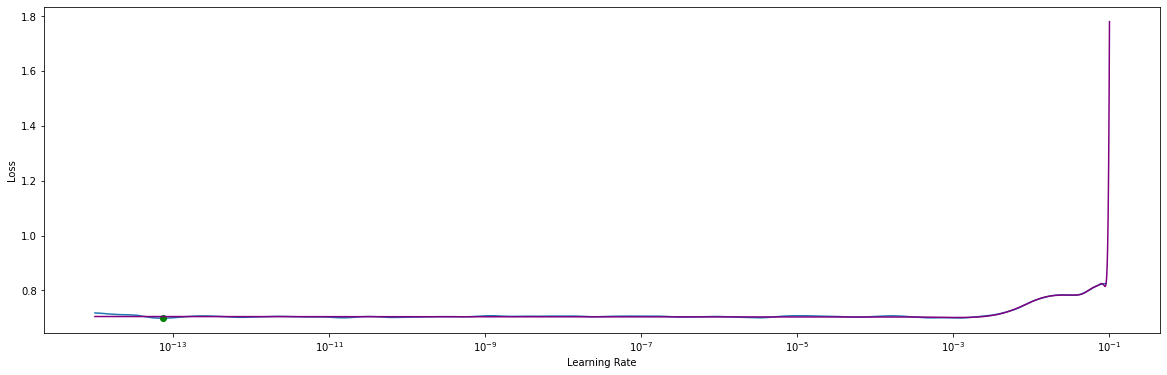

In [ ]:
history = modelLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest), callbacks=[lr_finder])

#**CyclicLearningRate Scheduler**

In [ ]:
# Github link: https://github.com/bckenstler/CLR
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import numpy as np

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr, max_lr, step_size, mode,
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [ ]:
with open('/content/global_minima.txt', 'r') as file:
    global_minima = file.read()

global_minima = float(global_minima)
global_minima

0.00112409371872843

In [ ]:
clr_step_size = int(4 * (len(Xtrain)/BATCH_SIZE))
base_lr = (80.0 * global_minima) / 100.0
max_lr = global_minima 
mode='exp_range'

In [ ]:
clr = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)

In [ ]:
# # history = modelHybrid.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest), callbacks=[clr, early_stopping])
reproduceResult()
history = modelLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest), callbacks=[clr, early_stopping])

Epoch 1/60
25/25 [==============================] - 3s 45ms/step - loss: 0.7232 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4650
Epoch 2/60
25/25 [==============================] - 1s 22ms/step - loss: 0.7224 - accuracy: 0.4925 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 3/60
25/25 [==============================] - 1s 21ms/step - loss: 0.7040 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5250
Epoch 4/60
25/25 [==============================] - 1s 22ms/step - loss: 0.6672 - accuracy: 0.5888 - val_loss: 0.6896 - val_accuracy: 0.5650
Epoch 5/60
25/25 [==============================] - 1s 23ms/step - loss: 0.5896 - accuracy: 0.7200 - val_loss: 0.6585 - val_accuracy: 0.5950
Epoch 6/60
25/25 [==============================] - 1s 22ms/step - loss: 0.2237 - accuracy: 0.9150 - val_loss: 0.7446 - val_accuracy: 0.7150
Epoch 7/60
25/25 [==============================] - 1s 23ms/step - loss: 0.0692 - accuracy: 0.9787 - val_loss: 1.5441 - val_accuracy: 0.7300
Epoch 8/60
25

In [ ]:
y_pred=np.argmax(modelLstm.predict(Xtest), axis=-1)
y_pred

7/7 [==============================] - 2s 9ms/step


array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
Ytest

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
y_test=np.argmax(Ytest, axis=1)
y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0])

In [ ]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy:  0.73
[[80 25]
 [29 66]]


#**Graph**

In [ ]:
import pandas as pd
def plot_results(H):
    results = pd.DataFrame({"Train Loss": H.history['loss'], "Validation Loss": H.history['val_loss'],
              "Train Accuracy": H.history['accuracy'], "Validation Accuracy": H.history['val_accuracy']
             })
    fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
    results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
    results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])

    
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epoch")
    plt.show()

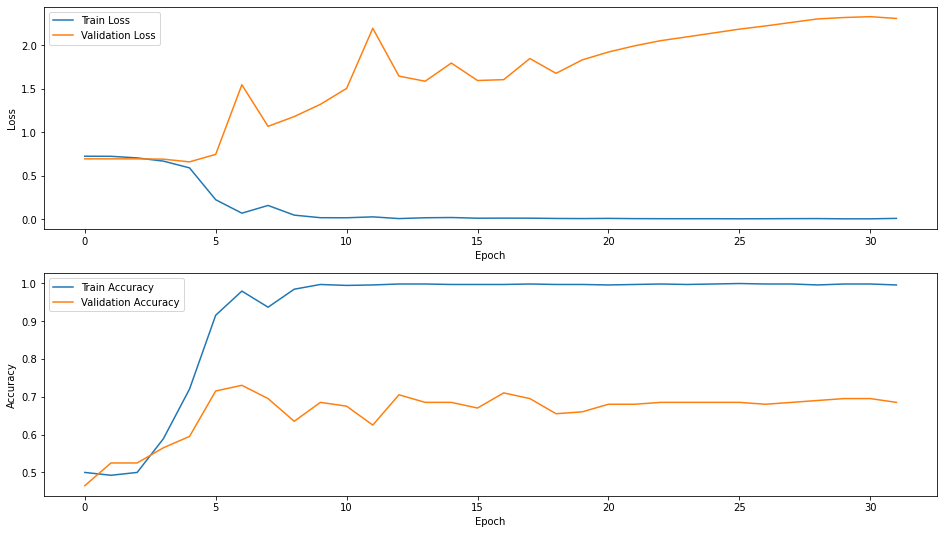

In [ ]:
plot_results(history)